In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

<AxesSubplot:>

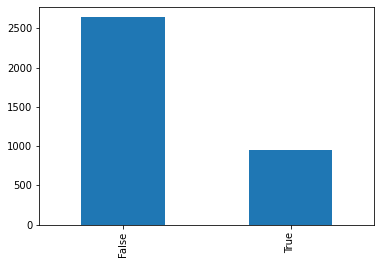

In [4]:
data['Churn'].value_counts().plot(kind='bar')

In [6]:
data.TotalCharges.value_counts().head(10)

         6
20.2     6
19.55    6
20.3     4
20.5     4
19.9     4
45.3     4
20.05    4
19.45    3
24.4     3
Name: TotalCharges, dtype: int64

In [7]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [9]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                    })

In [13]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)

,Dependents,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,Churn
Index,,,,,,,,,,,,,
3255,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,False
5,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,False
390,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,False
1222,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,True
1761,No,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,True


## Обработка всех данных в числовой вид

In [14]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data.head()

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,1,0,1,Yes,67,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,1,0,0,No,34,1,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,1,1,1,No,72,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.50,False
3,1,0,1,Yes,63,1,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.20,False
4,0,0,1,Yes,69,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [15]:
cols=data.columns
cols

Index(['Gender', 'Senior', 'Married', 'Dependents', 'Tenure', 'Phone',
       'MultiplePhones', 'Internet', 'Security', 'Backup', 'Insurance',
       'Support', 'TV', 'Movies', 'Contract', 'EBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
cat_cols=data.select_dtypes(exclude=['int64','float64']).columns
cat_cols

Index(['Dependents', 'MultiplePhones', 'Internet', 'Security', 'Backup',
       'Insurance', 'Support', 'TV', 'Movies', 'Contract', 'EBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')

In [17]:
enc_data=list(cat_cols)
enc_data=enc_data[:-1]
enc_data

['Dependents',
 'MultiplePhones',
 'Internet',
 'Security',
 'Backup',
 'Insurance',
 'Support',
 'TV',
 'Movies',
 'Contract',
 'EBilling',
 'PaymentMethod']

In [18]:
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data[enc_data].head()

,Dependents,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod
Index,,,,,,,,,,,,
0,1,1,0,2,2,2,2,2,0,2,0,1
1,0,2,0,2,2,0,2,0,0,1,1,3
2,0,2,1,2,2,2,2,0,0,2,1,0
3,1,0,0,2,2,2,2,0,0,2,0,3
4,1,2,1,0,2,2,0,2,0,1,0,1


In [19]:
data.dtypes

Gender              int64
Senior              int64
Married             int64
Dependents          int32
Tenure              int64
Phone               int64
MultiplePhones      int32
Internet            int32
Security            int32
Backup              int32
Insurance           int32
Support             int32
TV                  int32
Movies              int32
Contract            int32
EBilling            int32
PaymentMethod       int32
MonthlyCharges    float64
TotalCharges      float64
Churn                bool
dtype: object

In [20]:
x_data = data.select_dtypes(exclude=['bool'])
x_data

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,1,0,2,2,2,2,2,0,2,0,1,54.20,3623.95
1,1,0,0,0,34,1,2,0,2,2,0,2,0,0,1,1,3,64.40,2088.75
2,1,1,1,0,72,1,2,1,2,2,2,2,0,0,2,1,0,96.60,6827.50
3,1,0,1,1,63,1,0,0,2,2,2,2,0,0,2,0,3,63.55,4014.20
4,0,0,1,1,69,1,2,1,0,2,2,0,2,0,1,0,1,95.75,6511.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,1,0,0,0,5,1,0,1,0,0,0,0,2,0,0,0,2,80.20,384.25
3587,1,0,1,1,71,1,0,0,2,0,2,0,2,2,2,0,1,77.55,5574.35
3588,1,0,1,0,68,1,2,1,0,2,2,0,0,0,1,0,1,86.45,5762.95


# Модели

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_data, 
                                                    data.Churn,
                                                    test_size = 0.25,
                                                    random_state = 1)

In [67]:
ab =  AdaBoostClassifier(random_state=0)
ab.fit(X_train, Y_train)
ab_train = ab.predict (X_train)
print('Train evaluation')
print(classification_report(Y_train, ab_train))

Train evaluation
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1967
        True       0.67      0.57      0.61       726

    accuracy                           0.81      2693
   macro avg       0.76      0.73      0.74      2693
weighted avg       0.80      0.81      0.80      2693



Test evaluation
              precision    recall  f1-score   support

       False       0.86      0.91      0.88       672
        True       0.67      0.57      0.62       226

    accuracy                           0.82       898
   macro avg       0.77      0.74      0.75       898
weighted avg       0.81      0.82      0.82       898



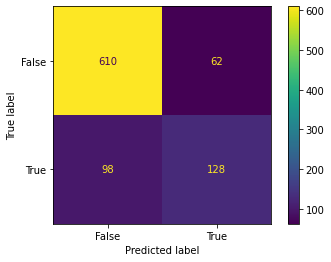

In [90]:
print('Test evaluation')
ab_test_predictions = ab.predict (X_test)
print(classification_report(Y_test, ab_test_predictions))
plot_confusion_matrix(estimator=ab, X= X_test, y_true=Y_test)

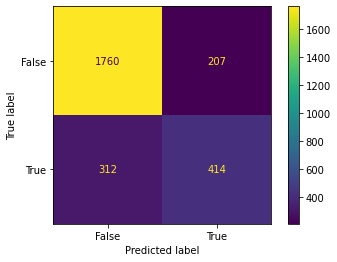

In [69]:
plot_confusion_matrix(estimator = ab, X= X_train, y_true=Y_train)

## Работа с тестовыми данными для соревнований

In [94]:
data_test = pd.read_csv('test.csv', index_col=0)
data_test.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,Male,0,No,No,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95
1,Female,0,Yes,Yes,26,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.80,2361.8
2,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1
3,Male,0,No,No,12,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,67.25,832.3
4,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.05,75.05


In [95]:
data_test.TotalCharges = data_test.TotalCharges.replace(' ', 0).astype(float)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 0 to 2394
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2395 non-null   object 
 1   Senior          2395 non-null   int64  
 2   Married         2395 non-null   object 
 3   Dependents      2395 non-null   object 
 4   Tenure          2395 non-null   int64  
 5   Phone           2395 non-null   object 
 6   MultiplePhones  2395 non-null   object 
 7   Internet        2395 non-null   object 
 8   Security        2395 non-null   object 
 9   Backup          2395 non-null   object 
 10  Insurance       2395 non-null   object 
 11  Support         2395 non-null   object 
 12  TV              2395 non-null   object 
 13  Movies          2395 non-null   object 
 14  Contract        2395 non-null   object 
 15  EBilling        2395 non-null   object 
 16  PaymentMethod   2395 non-null   object 
 17  MonthlyCharges  2395 non-null   f

In [96]:
data_test = data_test.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                    })

le=LabelEncoder()
data_test.head()
cols=data_test.columns
enc_data=list(cat_cols)
enc_data=enc_data[:-1]
data_test[enc_data]=data_test[enc_data].apply(lambda col:le.fit_transform(col))
data_test[enc_data].head()

,Dependents,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod
Index,,,,,,,,,,,,
0,0,0,1,2,2,0,0,2,2,1,0,0
1,1,0,1,0,0,0,0,2,2,0,1,2
2,0,0,1,2,0,2,2,0,0,1,1,1
3,0,2,0,2,2,0,2,0,0,0,1,2
4,0,2,1,0,0,0,0,0,0,0,1,3


In [97]:
data_test.dtypes

Gender              int64
Senior              int64
Married             int64
Dependents          int32
Tenure              int64
Phone               int64
MultiplePhones      int32
Internet            int32
Security            int32
Backup              int32
Insurance           int32
Support             int32
TV                  int32
Movies              int32
Contract            int32
EBilling            int32
PaymentMethod       int32
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [108]:
print('Test result')
test_predictions = model.predict (data_test)

Test result


In [109]:
path = 'result.csv'
pd_arr = pd.DataFrame(test_predictions)
pd_arr.to_csv(path)

In [107]:
data = pd.read_csv('result.csv', index_col=0)
data.head(5)
#data.shape

,Churn
Index,
0,False
1,True
2,False
3,False
4,True


Index,Churn

Итог. Мы попробовали несколько вариантов обработки данных: дамми, отбор наиболее весомых признаков наиболее коррелирующих и кодирование их в 0/1, кодирование всех признаков с помощью LabelEncoded. Остановились на последнем, так как в сочетании с выбранной моделью он дал лучший результат.

Мы попробовали несколько разных способов, но код оставили лишь итоговый. Пробовали линейную регрессию с различными параметрами (лучше результата как на тренировочных данных, так и на тестовых получено не было), больше всего работали именно с ней. Пробовали KNN, пробовали градиентный бустинг. AdaBoost классификатор, насколько помню, особо не рассматривался на занятиях. Но он был найден, когда я читала различные статьи по предсказаниям в МЛ. Попробовали его со стандартными настройками и он дал уже лучший результат, по сравнению с той же линейной регрессией.

А ещё, в поиске лучшего решения, пробовали и Over Sampling, который тоже был найден в одной из статей на просторах интернета по запросу в стиле "предсказания на несбалансированной выборке". И этот метод, кстати, показал удивительно хорошие результаты на тренировочной выборке (коэффициент Мэтьюса зашкаливал), но показал очень плохой результат на тестовых данных для паблик лидерборда:( Времени и способов попробовано было много, попыток для проверки было мало, но было очень интересно, спасибо за знакомство с Кегглем и возможность попробовать себя)